In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [4]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [50]:
class MultiVariateLinearRegression:
    
    def __init__(self, X, y):
        self.X = ((X - X.mean(axis=0))/X.std(axis=0))
        self.y = y
        self.coefs = np.random.uniform(low=-1, high=1, size=(X.shape[1],))
        self.bias = np.random.random()
        
    def compute_loss(self):
        losses = []
        for x,y in zip(self.X, self.y):
            yhat = self.predict(x)
            loss = (y - yhat)**2
            losses.append(loss)
        
        losses = np.array(losses)
        return losses.sum() / (2 * self.X.shape[0])
    
    ### Gradient Descent
    def calculate_gradients(self):
        grad_00 = 0
        coefs = list()
        
        yhat = np.array(self.get_all_preds())
#         print(yhat.shape)
        diff = yhat - self.y
#         print(diff.shape)
        grad_00 += diff.sum()/self.X.shape[0]
        
        for j in range(self.X.shape[1]):
#             print(self.X[:,j].shape)
            grad = (diff * self.X[:, j]).sum() / self.X.shape[0]
            coefs.append(grad)
            
        coefs = np.array(coefs)
#         print(coefs.shape)
#         print('-'*20)
#         print(grad_00, coefs, sep='\n')
        return (grad_00, coefs)
        
        
    def update_weights(self, gradients, learning_rate):
        grad_00, coefs = gradients
        self.bias = self.bias - (learning_rate * grad_00)
        self.coefs = self.coefs - (coefs * learning_rate)
        
    ### 
    
    def predict(self, x):
        return self.coefs.dot(x) + self.bias
    
#     def score(self):
#         pass
    
    def get_all_preds(self):
        preds = []
        for x in self.X:
            preds.append(self.predict(x))
        return preds
    
    def train(self, losses, iterations=1, alpha=0.01):
        for _ in range(iterations):
            gradients = self.calculate_gradients()
            self.update_weights(gradients, alpha)
            losses.append(self.compute_loss())
        return losses

### Initialising Model

In [51]:
multivariate = MultiVariateLinearRegression(X_train, y_train)
losses = [multivariate.compute_loss()]

In [52]:
losses

[291.81386928651966]

In [53]:
losses = multivariate.train(losses, iterations=200, alpha=0.01)
losses[-10:]

[17.416875700859542,
 17.309444135803567,
 17.20410371340554,
 17.100812882197864,
 16.999530921564062,
 16.900217925055532,
 16.802834784044798,
 16.70734317170838,
 16.61370552733284,
 16.521885040937093]

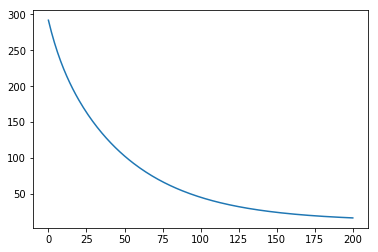

In [54]:
plt.figure()
plt.plot(losses)
plt.show()

In [55]:
multivariate.coefs

array([-0.45009466,  0.79407428, -0.22124834,  1.05378476, -0.14203093,
        2.97895978, -0.15974394, -1.11211548,  1.0530551 , -1.51977051,
       -1.48687804,  0.75240465, -3.33336649])